In [3]:
import pandas as pd

RuntimeError: CPU dispatcher tracer already initlized

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Random Data
np.random.seed(0)  # For reproducibility

n_samples = 100

def generate_positive_normal(loc, scale, size):
    """Generates positive values from a normal distribution."""
    arr = np.random.normal(loc=loc, scale=scale, size=size)
    arr = np.abs(arr)  # Ensure positivity
    arr = arr + 0.1 # Ensure no values are exactly zero
    return arr

# Group 1:
group1_x = generate_positive_normal(loc=1, scale=1, size=n_samples)
group1_y = generate_positive_normal(loc=1, scale=1, size=n_samples)
group1_group = ['A'] * n_samples

# Group 2:
group2_x = generate_positive_normal(loc=5, scale=1.5, size=n_samples)
group2_y = generate_positive_normal(loc=5, scale=1.5, size=n_samples)
group2_group = ['B'] * n_samples

# Group 3:
group3_x = generate_positive_normal(loc=9, scale=1, size=n_samples)
group3_y = generate_positive_normal(loc=2, scale=1, size=n_samples)
group3_group = ['C'] * n_samples

# Combine data
x = np.concatenate([group1_x, group2_x, group3_x])
y = np.concatenate([group1_y, group2_y, group3_y])
group = np.concatenate([group1_group, group2_group, group3_group])

# 2. Create Pandas DataFrame
df = pd.DataFrame({'x': x, 'y': y, 'group': group})

# 3. Generate Scatter Plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
for g in df['group'].unique():
    plt.scatter(df[df['group'] == g]['x'], df[df['group'] == g]['y'], label=g)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Random Scatter Plot with 3 Groups')
plt.legend()
plt.grid(True)
plt.show()

# 4. Print the table (DataFrame)
df

RuntimeError: CPU dispatcher tracer already initlized

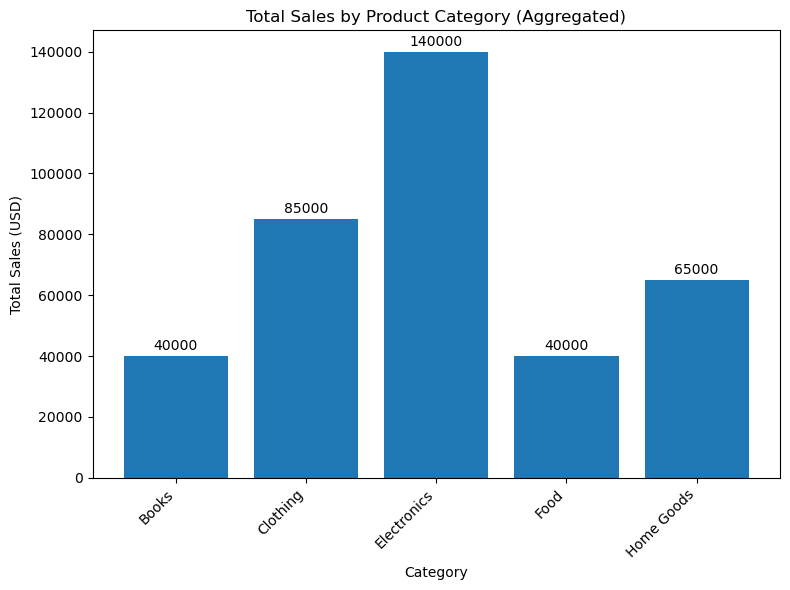

,Category,Sales,Transaction_ID
0,Electronics,60000,1
1,Clothing,30000,2
2,Books,12000,3
3,Electronics,45000,4
4,Home Goods,25000,5
5,Clothing,55000,6
6,Food,18000,7
7,Books,28000,8
8,Home Goods,40000,9
9,Electronics,35000,10


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample Data: Sales Transactions with Multiple Entries per Category
data = {'Category': ['Electronics', 'Clothing', 'Books', 'Electronics', 'Home Goods',
              'Clothing', 'Food', 'Books', 'Home Goods', 'Electronics', 'Food'],
        'Sales': [60000, 30000, 12000, 45000, 25000,
                  55000, 18000, 28000, 40000, 35000, 22000],
        'Transaction_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}  # Added an ID for clarity
df = pd.DataFrame(data)

# Aggregate Sales by Category
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Create the Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(category_sales['Category'], category_sales['Sales'])

# Add Labels and Title
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.title('Total Sales by Product Category (Aggregated)')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add the exact value on top of each bar
for i, value in enumerate(category_sales['Sales']):
    plt.text(i, value + 1000, str(value), ha='center', va='bottom')

# Show the Plot
plt.tight_layout()
plt.show()

df

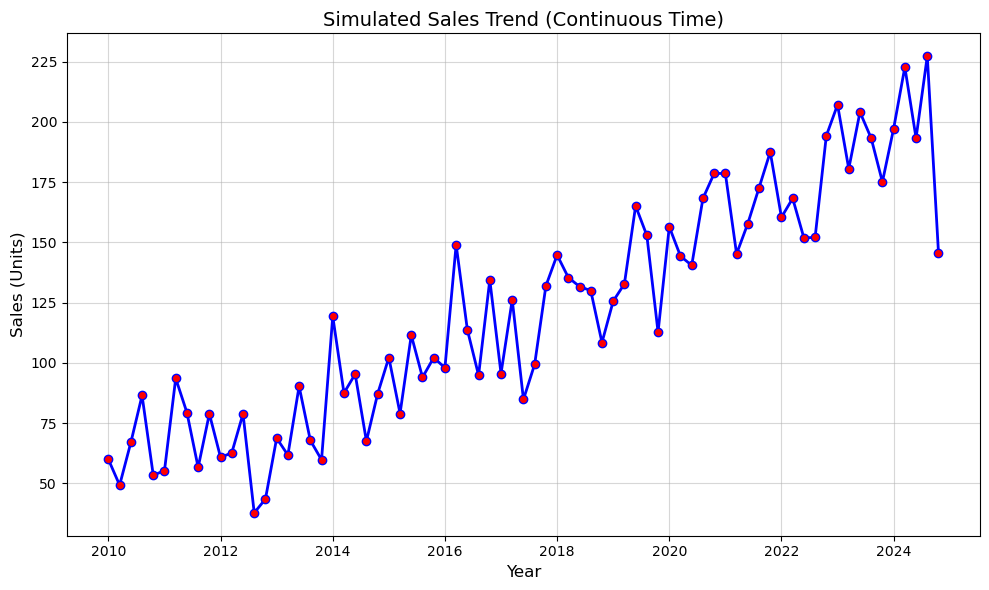

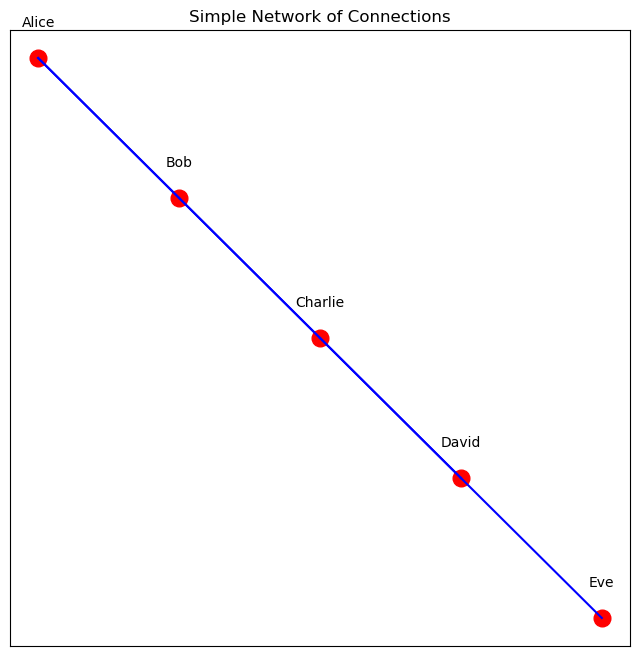

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Generate More Realistic and Continuous Data for Line Chart
np.random.seed(42)  # For reproducibility

# Simulate a time series with some trend and random fluctuations
years = np.arange(2010, 2025, 0.2)  # More data points (every 0.2 years)
base_sales = 50 + (years - 2010) * 10  # Upward trend
random_fluctuations = np.random.normal(0, 20, len(years))  # Random noise
sales = base_sales + random_fluctuations
sales = np.clip(sales, 10, 300)  # Ensure sales stay within a reasonable range

df_line_continuous = pd.DataFrame({'Year': years, 'Sales': sales})

# 2. Sample Data for a Simple Network Graph (Connections between People)
data_network = {'Person1': ['Alice', 'Alice', 'Bob', 'Charlie', 'David'],
                'Person2': ['Bob', 'Charlie', 'David', 'David', 'Eve']}
df_network = pd.DataFrame(data_network)


# --- Plotting ---

# 1. Line Chart with Continuous Variable and More Data Points
plt.figure(figsize=(10, 6))  # Slightly larger figure
plt.plot(df_line_continuous['Year'], df_line_continuous['Sales'], marker='o', linestyle='-', color='blue', linewidth=2, markersize=6) # Blue line, circle markers
plt.plot(df_line_continuous['Year'], df_line_continuous['Sales'], marker='.', linestyle='', color='red', markersize=8) # Red points, no line

plt.title('Simulated Sales Trend (Continuous Time)', fontsize=14) # More descriptive title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales (Units)', fontsize=12)
plt.grid(True, alpha=0.5) # Fainter grid
plt.xticks(np.arange(2010, 2026, 2)) #  Less dense x-ticks
plt.tight_layout() # Improves layout
plt.show()


# 2. Simple Network Graph Example (No Changes Here)
plt.figure(figsize=(8, 8))
people = sorted(list(set(df_network['Person1']) | set(df_network['Person2'])))
pos = {person: i for i, person in enumerate(people)}

for person, position in pos.items():
    plt.plot(position, len(pos) - position, 'ro', markersize=12)
    plt.text(position, len(pos) - position + 0.2, person, ha='center', va='bottom')

for i, row in df_network.iterrows():
    p1 = row['Person1']
    p2 = row['Person2']
    plt.plot([pos[p1], pos[p2]], [len(pos) - pos[p1], len(pos) - pos[p2]], 'b-')

plt.title('Simple Network of Connections')
plt.xticks([])
plt.yticks([])
plt.show()

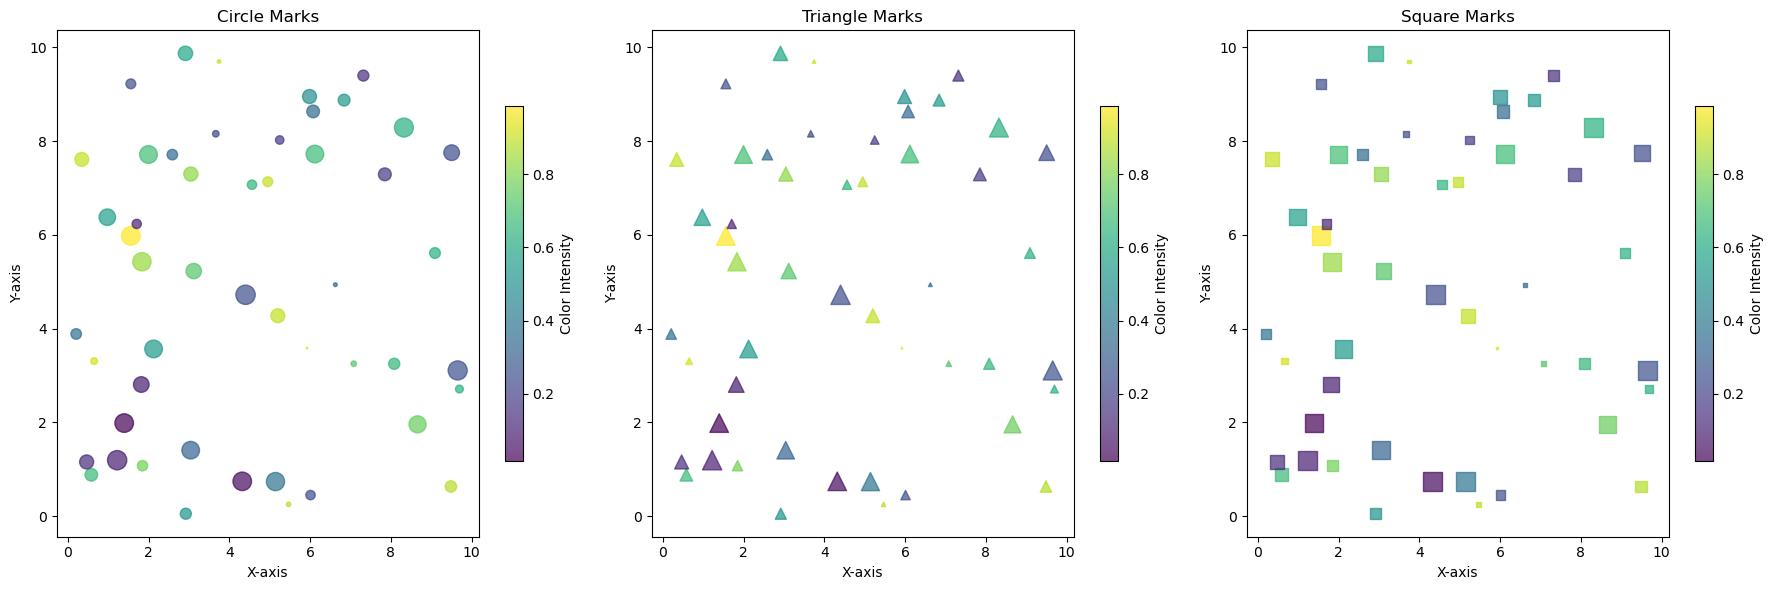

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data
np.random.seed(42)
x = np.random.rand(50) * 10
y = np.random.rand(50) * 10
sizes = np.random.rand(50) * 200  # Varying sizes
colors = np.random.rand(50)       # Varying colors

# Create Scatter Plot
plt.figure(figsize=(6, 5))
plt.scatter(x, y, s=sizes, c=colors, alpha=0.7, cmap='viridis')  # 'o' is default for circles
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Point Marks (Scatter Plot)')
plt.colorbar(label='Color Intensity')  # Show color scale
plt.show()

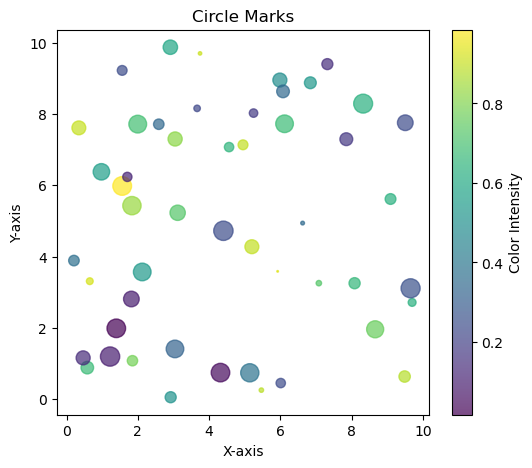

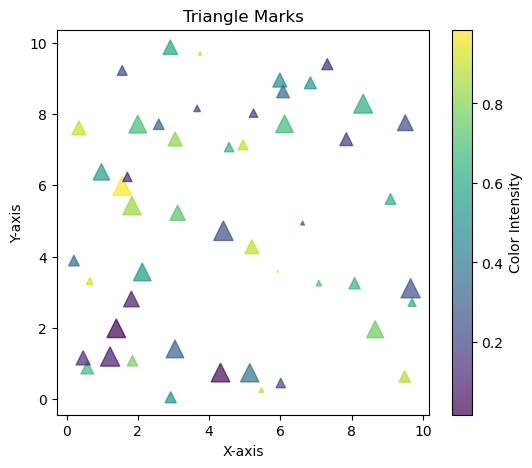

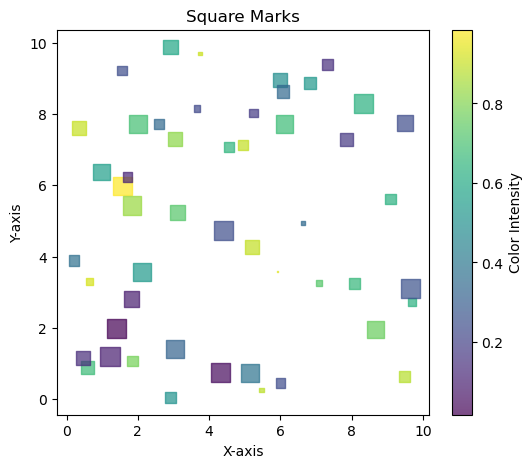

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data (same as before)
np.random.seed(42)
x = np.random.rand(50) * 10
y = np.random.rand(50) * 10
sizes = np.random.rand(50) * 200
colors = np.random.rand(50)

# 1. Scatter Plot with Circle Marks (Figure 1)
plt.figure(figsize=(6, 5))
plt.scatter(x, y, s=sizes, c=colors, marker='o', alpha=0.7, cmap='viridis')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Circle Marks')
plt.colorbar(label='Color Intensity')
plt.show()

# 2. Scatter Plot with Triangle Marks (Figure 2)
plt.figure(figsize=(6, 5))
plt.scatter(x, y, s=sizes, c=colors, marker='^', alpha=0.7, cmap='viridis')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Triangle Marks')
plt.colorbar(label='Color Intensity')
plt.show()

# 3. Scatter Plot with Square Marks (Figure 3)
plt.figure(figsize=(6, 5))
plt.scatter(x, y, s=sizes, c=colors, marker='s', alpha=0.7, cmap='viridis')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Square Marks')
plt.colorbar(label='Color Intensity')
plt.show()

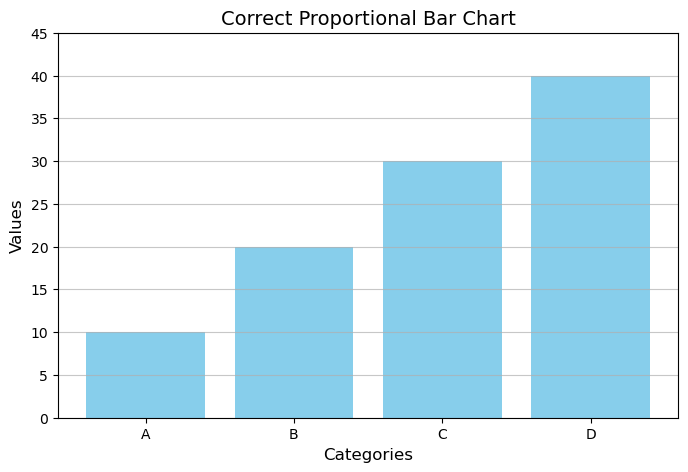

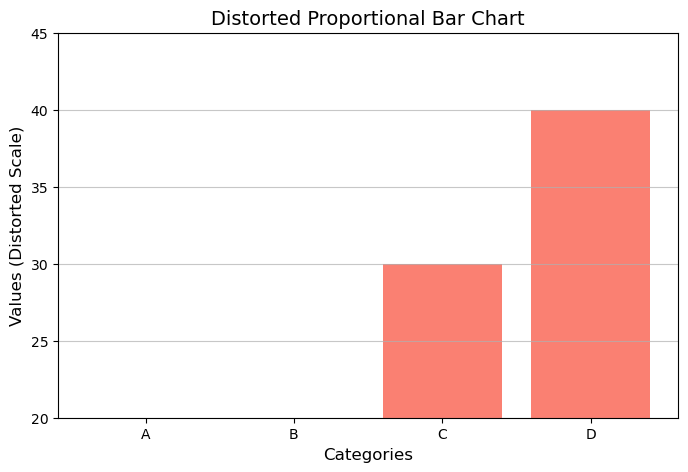

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data
categories = ['A', 'B', 'C', 'D']
values = [10, 20, 30, 40]

# --- Correct Proportional Representation ---

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='skyblue')
plt.ylim(0, 45)  # Set a y-axis limit that clearly shows proportionality
plt.title('Correct Proportional Bar Chart', fontsize=14)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.show()

# --- Distorted Proportional Representation ---

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='salmon')
plt.ylim(20, 45)  # Intentionally distorting the y-axis scale
plt.title('Distorted Proportional Bar Chart', fontsize=14)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Values (Distorted Scale)', fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.show()

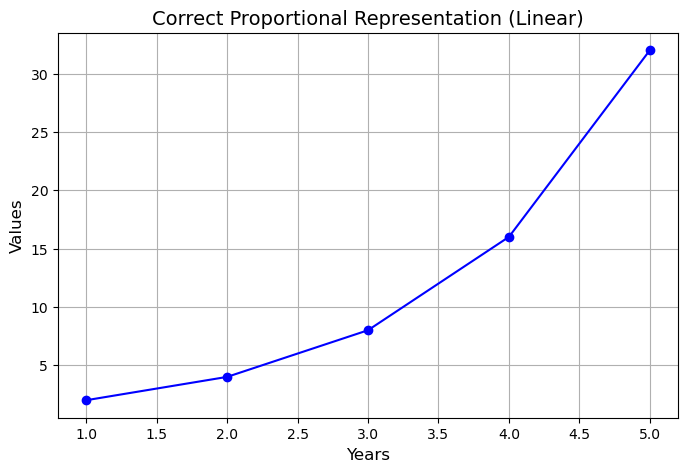

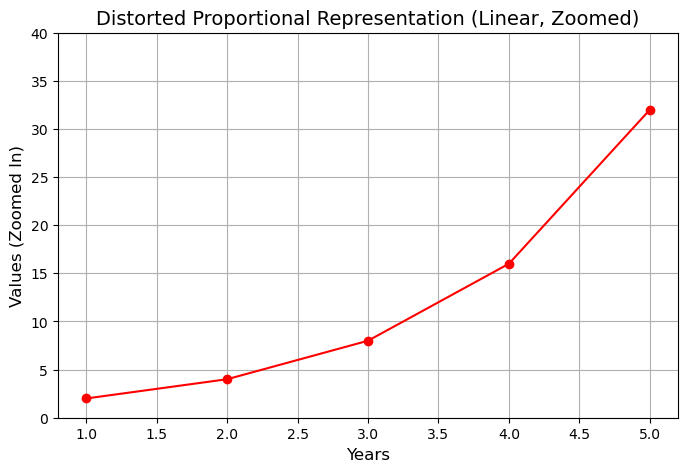

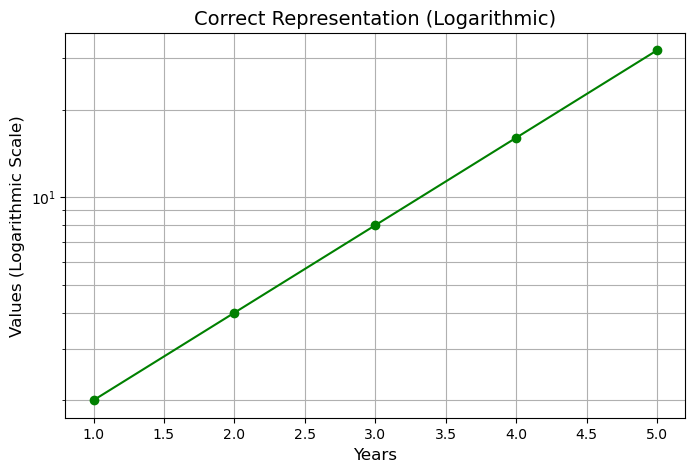

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data: Exponential Growth
years = np.array([1, 2, 3, 4, 5])
values = np.array([2, 4, 8, 16, 32])  # Exponential growth

# --- Correct Proportional Representation (Linear Y-axis) ---

plt.figure(figsize=(8, 5))
plt.plot(years, values, marker='o', linestyle='-', color='blue')
plt.title('Correct Proportional Representation (Linear)', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.grid(True)
plt.show()

# --- Distorted Proportional Representation (Linear Y-axis, Zoomed In) ---

plt.figure(figsize=(8, 5))
plt.plot(years, values, marker='o', linestyle='-', color='red')
plt.title('Distorted Proportional Representation (Linear, Zoomed)', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Values (Zoomed In)', fontsize=12)
plt.ylim(0, 40)  # Zoom in on the Y-axis
plt.grid(True)
plt.show()

# --- Correct Representation (Logarithmic Y-axis) ---

plt.figure(figsize=(8, 5))
plt.plot(years, values, marker='o', linestyle='-', color='green')
plt.title('Correct Representation (Logarithmic)', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Values (Logarithmic Scale)', fontsize=12)
plt.yscale('log')  # Use a logarithmic y-axis
plt.grid(True, which='both')
plt.show()

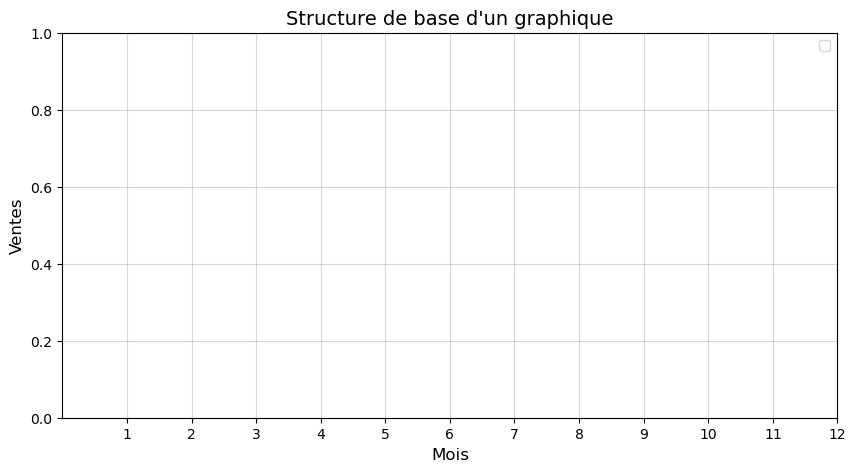

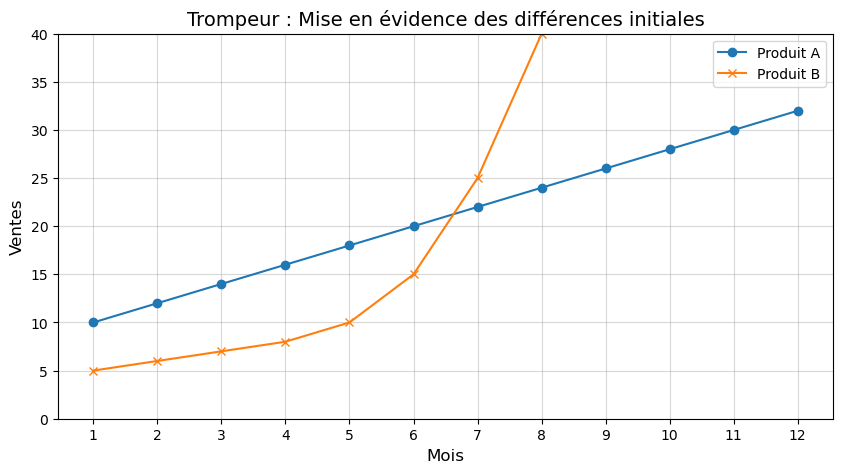

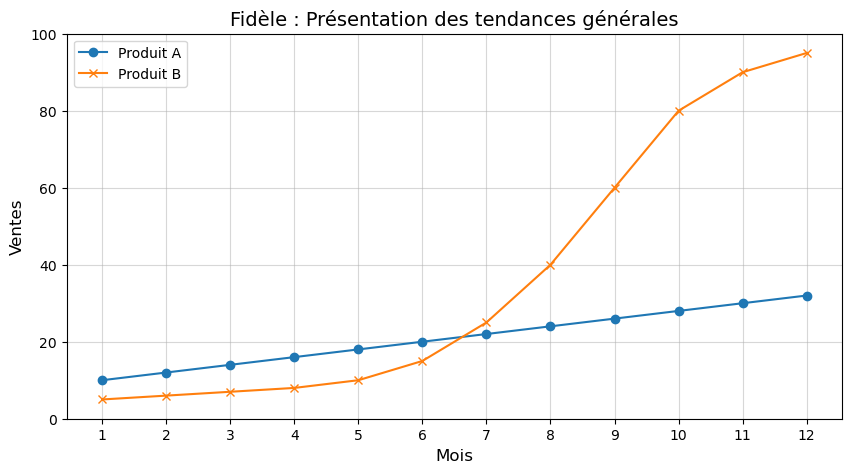

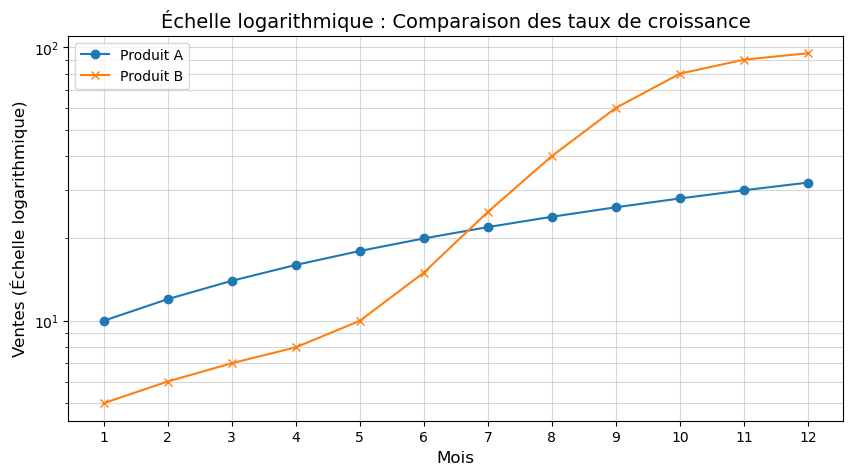

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Données d'exemple : Deux produits avec des profils de croissance différents
mois = np.arange(1, 13)
ventes_produit_a = np.array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32])  # Croissance régulière
ventes_produit_b = np.array([5, 6, 7, 8, 10, 15, 25, 40, 60, 80, 90, 95])  # Croissance rapide, puis plateau

# --- Visualisation 0 : Structure de base (pour l'éducation) ---

plt.figure(figsize=(10, 5))
plt.xticks(mois)  # Set x-ticks to be the months
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Ventes', fontsize=12)
plt.title('Structure de base d\'un graphique', fontsize=14)
plt.legend(['Produit A', 'Produit B'])  # Placeholder legend
plt.grid(True, alpha=0.5)
plt.show()

# --- Visualisation 1 : Échelle trompeuse ---

plt.figure(figsize=(10, 5))
plt.plot(mois, ventes_produit_a, label='Produit A', marker='o')
plt.plot(mois, ventes_produit_b, label='Produit B', marker='x')
plt.xticks(mois)  # Set x-ticks to be the months
plt.ylim(0, 40)  # Restriction de l'axe des y pour souligner les différences initiales
plt.title('Trompeur : Mise en évidence des différences initiales', fontsize=14)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Ventes', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

# --- Visualisation 2 : Représentation fidèle ---

plt.figure(figsize=(10, 5))
plt.plot(mois, ventes_produit_a, label='Produit A', marker='o')
plt.plot(mois, ventes_produit_b, label='Produit B', marker='x')
plt.xticks(mois)  # Set x-ticks to be the months
plt.ylim(0, 100)  # Axe des y complet pour montrer l'ensemble de la situation
plt.title('Fidèle : Présentation des tendances générales', fontsize=14)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Ventes', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

# --- Visualisation 3 : Échelle logarithmique pour souligner le taux de croissance ---

plt.figure(figsize=(10, 5))
plt.plot(mois, ventes_produit_a, label='Produit A', marker='o')
plt.plot(mois, ventes_produit_b, label='Produit B', marker='x')
plt.xticks(mois)  # Set x-ticks to be the months
plt.yscale('log')  # Axe des y logarithmique
plt.title('Échelle logarithmique : Comparaison des taux de croissance', fontsize=14)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Ventes (Échelle logarithmique)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5, which='both')
plt.show()

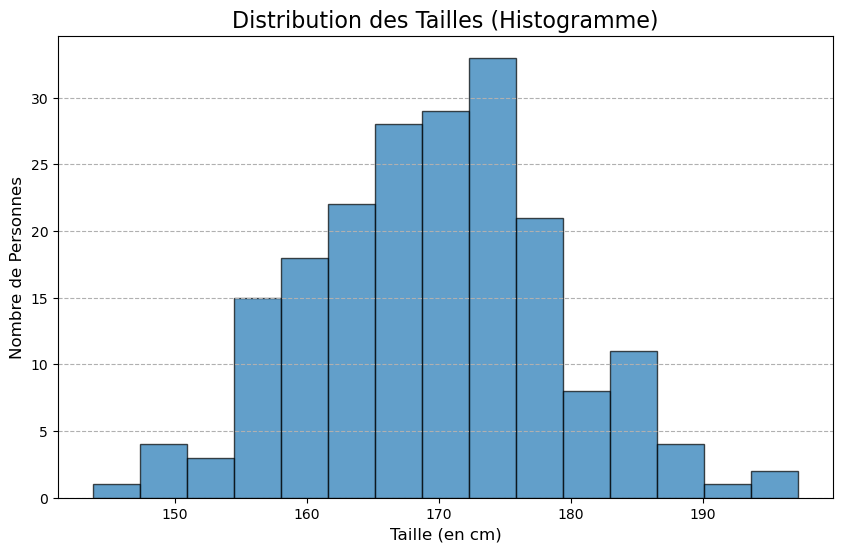

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Générer des données aléatoires pour l'exemple (par exemple, les tailles en cm d'un groupe de personnes)
np.random.seed(42) # Pour la reproductibilité
tailles = np.random.normal(loc=170, scale=10, size=200)

# Créer l'histogramme
plt.figure(figsize=(10, 6)) # Définir la taille de la figure
plt.hist(tailles, bins=15, edgecolor='black', alpha=0.7) # Créer l'histogramme

# Ajouter des titres et des labels
plt.title('Distribution des Tailles (Histogramme)', fontsize=16)
plt.xlabel('Taille (en cm)', fontsize=12)
plt.ylabel('Nombre de Personnes', fontsize=12)
plt.grid(axis='y', linestyle='--') # Ajouter une grille sur l'axe y

# Afficher l'histogramme
plt.show()

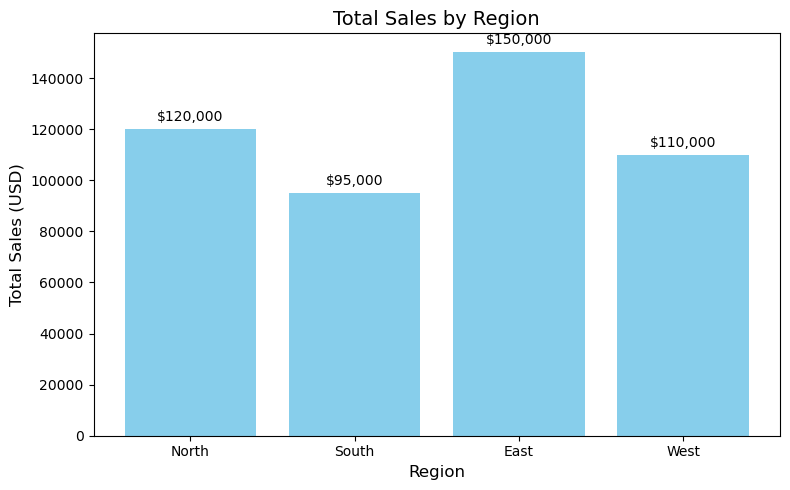

Data Used for the Bar Plot:


,Region,Sales
0,North,120000
1,South,95000
2,East,150000
3,West,110000


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample Data: Sales by Region
data = {'Region': ['North', 'South', 'East', 'West'],
        'Sales': [120000, 95000, 150000, 110000]}
df = pd.DataFrame(data)

# Create the Bar Plot
plt.figure(figsize=(8, 5))  # Adjust figure size if needed
plt.bar(df['Region'], df['Sales'], color='skyblue')

# Add Labels and Title
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.title('Total Sales by Region', fontsize=14)

# Add value labels on top of the bars (optional)
for i, value in enumerate(df['Sales']):
    plt.text(i, value + 2000, f'${value:,}', ha='center', va='bottom', fontsize=10)

# Show the Plot
plt.tight_layout()
plt.show()

# Display the Data Table
print("Data Used for the Bar Plot:")
df